# Overview and Motivation

With the popularity of the Internet, sensors and various digital terminal devices, an interconnected world is taking shape. At the same time, with the explosive exponential growth of data, data analysis has penetrated into all aspects of our daily life and pushed us to an era of profound change. The education field has no exception. Through the mining and analysis of a large number of students' education process and organization management data collected by modern schools, we can get the characteristics with strong data causality with students' final scores, and then make a reliable early prediction of students' future performance. The prediction of students' academic performance not only helps the school to timely intervene in the curriculum, enrich the classroom content and improve the training plan, but also helps to analyze students' academic performance, understand students' learning trends, encourage excellent students to achieve better results, and encourage students with relatively weak foundation to establish confidence and make continuous progress.

# Research Question

We managed to obtain a relevant dataset from Kaggle.<br>
Based on the dataset, we will be answering these specific questions:
<br>
1.   How the variables can influence individual student performance in Portugal language study.
2.   What is the machine learning algorithm that can be used to predict student’s performance? 
3.   What is the accuracy for the models in predicting students’ performance?

# Data Cleaning/Data Preprocessing

## Load library

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

## Import and read dataset

The initial dataset is separated with semicolon(;). The data is converted into table form.

In [2]:
dataseturl = 'https://drive.google.com/uc?id=18gjZIQO6OKZqxbk-BD2MpaEKZqJqUWwG'
pd.set_option('display.max_columns', None)
rawdf = pd.read_csv(dataseturl, sep=';')
print(rawdf.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2        2.0         0       yes     no   no   
1  course   father           1        2.0         0        no    yes   no   
2   other   mother           1        2.0         0       yes     no   no   
3    home   mother           1        3.0         0        no    yes   no   
4    home   father           1        2.0         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


## Attributes for the variables in the dataset.

1.  school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2.   sex - student's sex (binary: "F" - female or "M" - male)

1.   age - student's age (numeric: from 15 to 22)

1.   address - student's home address type (binary: "U" - urban or "R" - rural)

1.   famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)

1.   Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)

1.   Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
2.   Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
2.   Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

2.   Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

2.   reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

2.   guardian - student's guardian (nominal: "mother", "father" or "other")

1.   traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
2.   studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

1.   failures - number of past class failures (numeric: n if 1<=n<3, else 4)
2.   schoolsup - extra educational support (binary: yes or no)

1.   famsup - family educational support (binary: yes or no)
2.   paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

1.   activities - extra-curricular activities (binary: yes or no)

1.   nursery - attended nursery school (binary: yes or no)
2.   higher - wants to take higher education (binary: yes or no)

2.   internet - Internet access at home (binary: yes or no)

1.   romantic - with a romantic relationship (binary: yes or no)
2.   famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

1.   freetime - free time after school (numeric: from 1 - very low to 5 - very high)
2.   goout - going out with friends (numeric: from 1 - very low to 5 - very high)

1.   Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

1.   Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
2.   health - current health status (numeric: from 1 - very bad to 5 - very good)

2.   absences - number of school absences (numeric: from 0 to 93)

---
**These grades are related with the  Portuguese subject:**

1.   G1 - first period grade (numeric: from 0 to 20)
2.   G2 - second period grade (numeric: from 0 to 20)
1.   G3 - final grade (numeric: from 0 to 20, output target)

## Checking any non-availability (NA) inside the dataset

In [3]:
rawdf.isna().sum()

school        8
sex           3
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     2
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We can see there are variables that contain NA value. We will handle accordingly.

1. student's school (school)
2. student's sex (sex)
3. weekly study time(studytime)

## Imputation

We know that school and sex are in nominal pattern, hence We will handle using imputation by mode.

In [4]:
#Impute missing value in school and sex using mode.
Cols = ['school', 'sex']

for Col in Cols:
    rawdf[Col] = rawdf[Col].fillna(rawdf[Col].mode()[0])
    print(rawdf['school'].isna().sum())

0
0


Weekly study time is a numeric data where the dataset has categorized into a range of 1, 2, 3, 4.
In this case, we will handle using imputation by median.

In [5]:
rawdf['studytime'] = rawdf['studytime'].fillna(rawdf['studytime'].median())
rawdf['studytime'].isna().sum()

0

## Check values pattern consistency

In [6]:
for nom_var in rawdf.columns[rawdf.dtypes.eq('object')]:
  print(rawdf[nom_var].value_counts().sort_index())
  print('\n')

GP    423
MS    226
Name: school, dtype: int64


F    383
M    266
Name: sex, dtype: int64


R    197
U    452
Name: address, dtype: int64


GT3    457
LE3    192
Name: famsize, dtype: int64


A     80
T    569
Name: Pstatus, dtype: int64


at_home     135
health       48
other       258
services    136
teacher      72
Name: Mjob, dtype: int64


at_home      42
health       23
other       367
services    181
teacher      36
Name: Fjob, dtype: int64


course        285
home          149
other          72
reputation    143
Name: reason, dtype: int64


father    153
mother    455
other      41
Name: guardian, dtype: int64


no     581
yes     68
Name: schoolsup, dtype: int64


no     251
yes    398
Name: famsup, dtype: int64


no     610
yes     39
Name: paid, dtype: int64


no     334
yes    315
Name: activities, dtype: int64


no     128
yes    521
Name: nursery, dtype: int64


no      69
yes    580
Name: higher, dtype: int64


no     151
yes    498
Name: internet, dtype: int64


no    

We can see that there are no inconsistent naming of values.

## Visualising distribution of numerical variables:




We can use histogram to visualise the distributions of numerical variables:

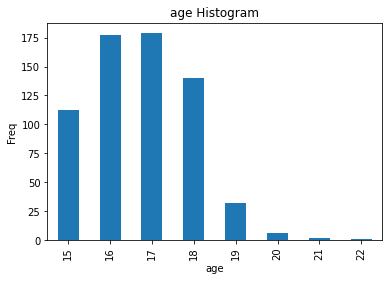

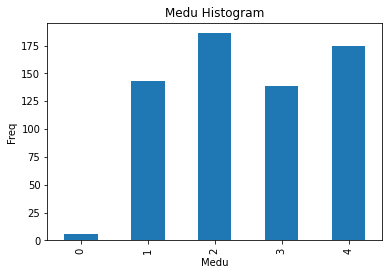

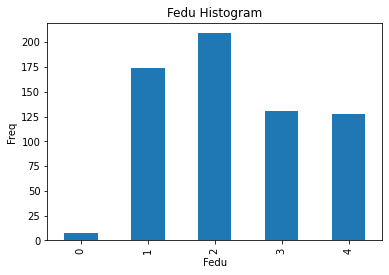

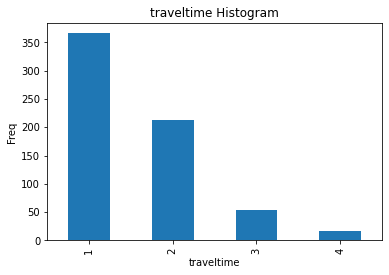

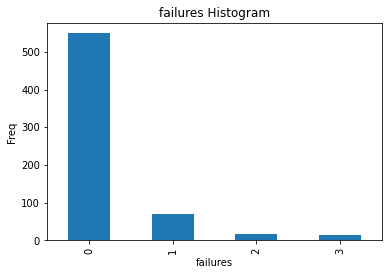

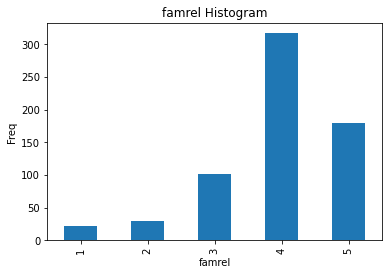

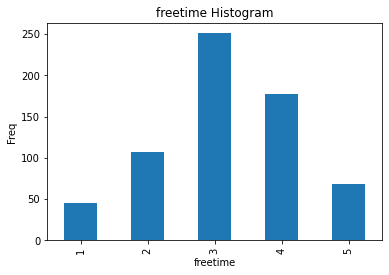

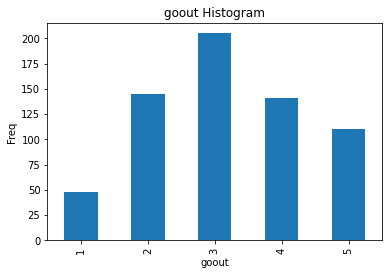

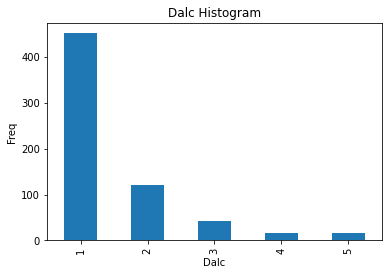

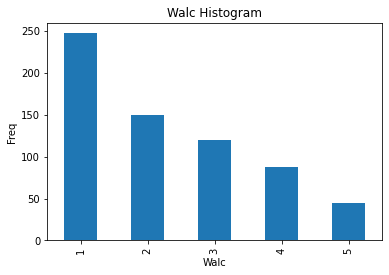

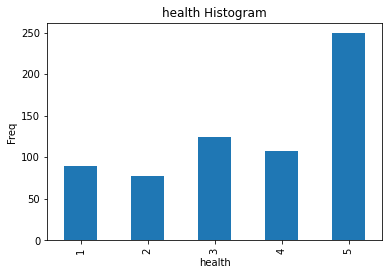

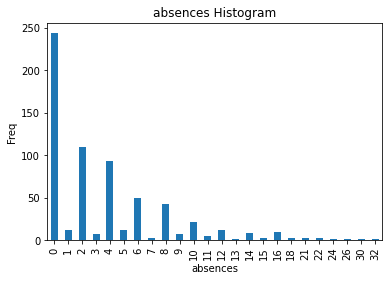

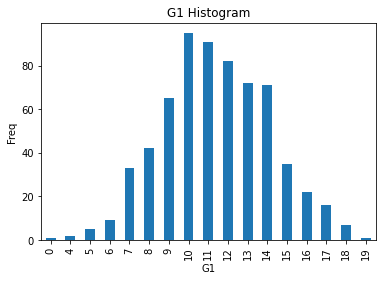

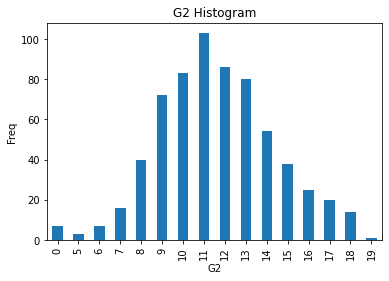

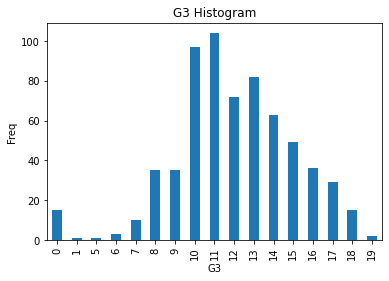

In [7]:
for numvar in rawdf.columns[rawdf.dtypes.eq('int64')]:
  plt.title(numvar + " Histogram")
  plt.xlabel(numvar)
  plt.ylabel('Freq')
  rawdf[numvar].value_counts().sort_index().plot(kind="bar")
  plt.show()
  

We see that there are very small number of students with Medu=0 or Fedu=0. On the other hand, the number of students with G3=0 is unexpectedly high.

## Feature selection

### For categorical variables: <br>
We use a boxplot to visualise the distribution of target G3 for different group of students

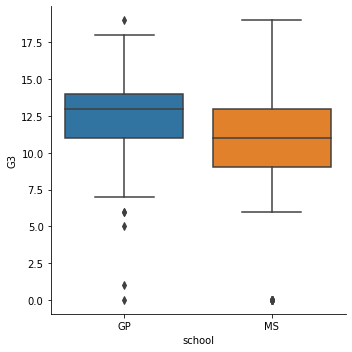

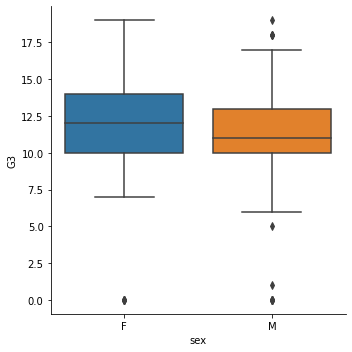

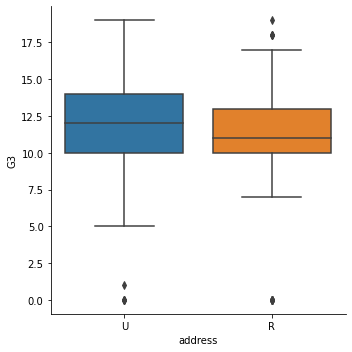

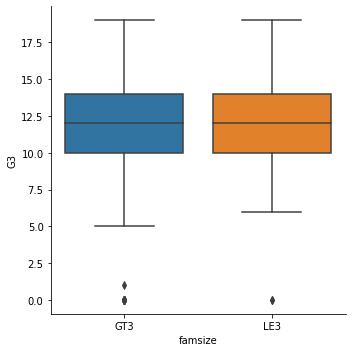

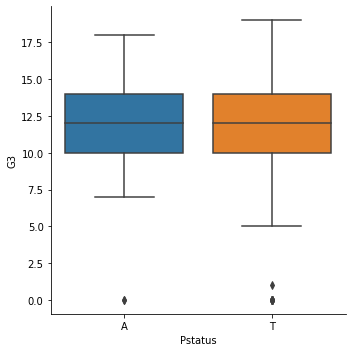

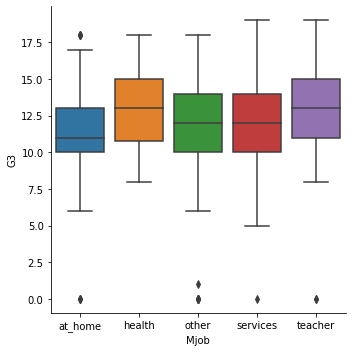

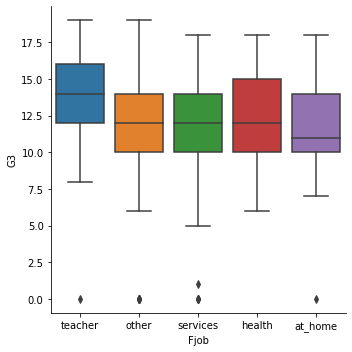

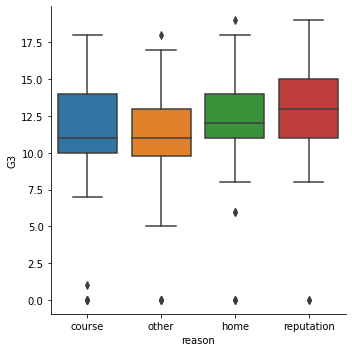

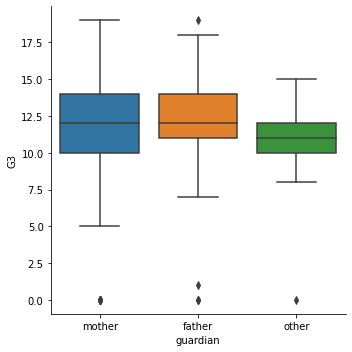

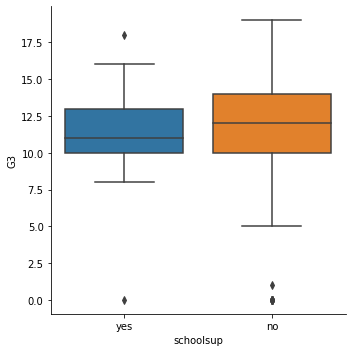

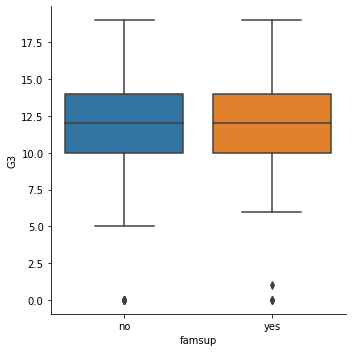

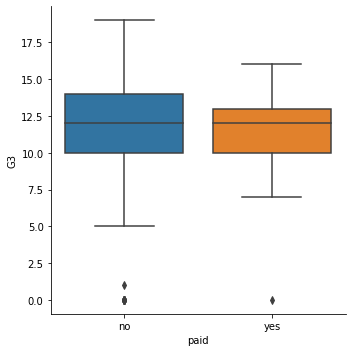

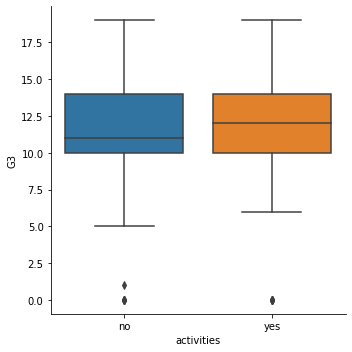

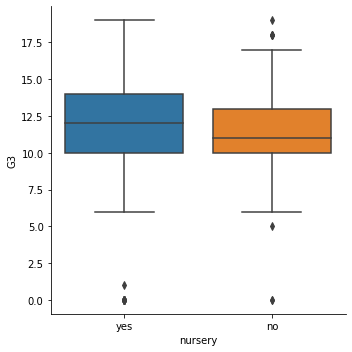

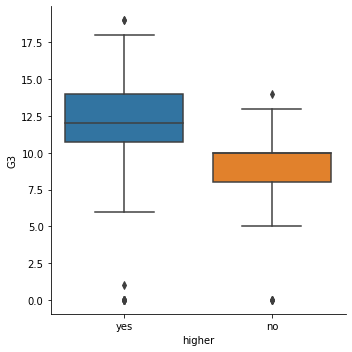

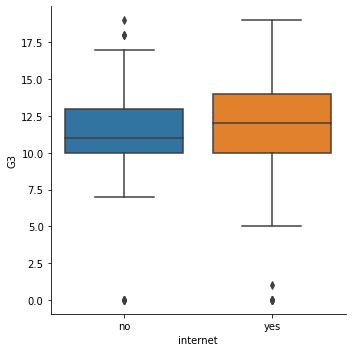

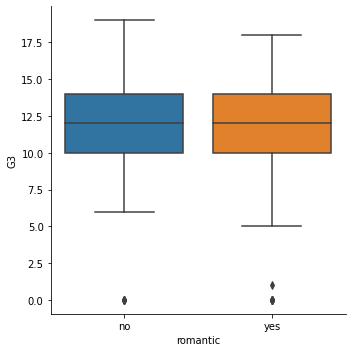

In [8]:
#filter out categorical variables
catvar = rawdf.columns[rawdf.dtypes.eq('object')]

# plot box plot
for cvar in catvar:
  sns.catplot(x=cvar, y="G3", kind="box", data=rawdf)
  plt.show()

From the figures, we can see that there is not much variation across different groups in the following variables:
1. family size (famsize),
2. parent's cohabitation status (Pstatus),
3. family educational support (famsup),
4. extra paid classes within the course subject (paid),
5. with a romantic relationship (romantic).

Hence we will consider to drop these variables.

### For numerical variables: <br>
We use a heatmap and scatterplot to investigate on the corelation of each variables with G3

<AxesSubplot:>

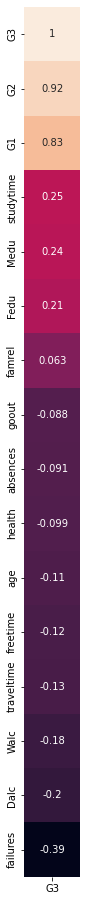

In [9]:
plt.figure(figsize=(1, 16))
corrcol = rawdf.corr()[['G3']]
sns.heatmap(corrcol.sort_values(by='G3', ascending=False), annot=True, cbar=False)

By observing the heatmap, we can identify those variables which show a very weak correlation (|r| < 0.1) to our output:

1. number of school absences (absences),
2. quality of family relationships (famrel),
3. going out with friends (goout),
4. current health status (health).

We will use scatterplot to identify if there are any abnormal values that affect the correlation.

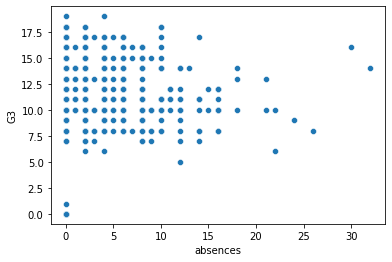

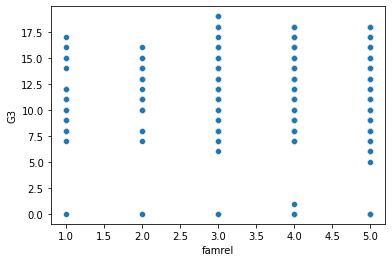

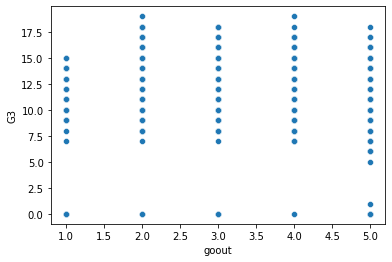

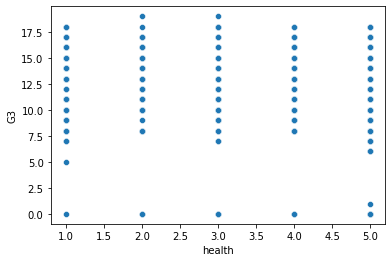

In [10]:
#Plot G3 versus absences/famrel/goout/health
vars = ['absences', 'famrel','goout','health']

for var in vars:
    sns.scatterplot(x=rawdf[var], y = rawdf.G3)
    plt.show()

We can see that there is some extreme condition in absences variable. But it is still worth to keep as it has a negative correlation pattern against G3.

For the remaining variables, data is evenly distributed. Hence, we will keep the absences variable for further analysis and consider to drop the other three.

### Chi2 Test
To support our previous finding, we do a Chi-Squared Test to find features relevancy score to our target.

In [11]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

chi2_df = rawdf.copy()
label_encoder = LabelEncoder()

for nom_var in chi2_df.columns[chi2_df.dtypes.eq('object')]:
  chi2_df[nom_var] = label_encoder.fit_transform(chi2_df[nom_var])

x = chi2_df.drop('G3',axis=1)
y = chi2_df['G3']

# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(x, y)

# Look at scores returned from the selector for each feature
chi2_scores = pd.DataFrame(list(zip(chi2_df.columns, chi2_selector.scores_)), columns=['features', 'score'])
chi2_scores.sort_values(by='score', ascending=False)

,features,score
31,G2,418.452113
30,G1,333.615973
29,absences,294.362769
14,failures,255.779332
0,school,60.035797
26,Dalc,35.491003
8,Mjob,34.888847
10,reason,33.617500
6,Medu,33.567952
7,Fedu,32.368762


In [12]:
cleandf = rawdf.drop(['famsize','Pstatus','famsup','paid','romantic', 'famrel','goout','health'], axis=1)
print(cleandf.columns)


Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'activities', 'nursery', 'higher', 'internet', 'freetime',
       'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


### Dropping of Variables
We will be dropping variables based on the findings from the 3 previous sections. First we use boxplot, correlation and scatter plot to filter out a total of 8 candidates, then we make the final decision with the help of Chi-Squared Test. A critical value of 15 is set, where we find that all the 8 variables have chi2 value below it. Hence, they are all dropped: <br>
1. family size (famsize),
2. parent's cohabitation status (Pstatus),
3. family educational support (famsup),
4. extra paid classes within the course subject (paid),
5. with a romantic relationship (romantic),
6. quality of family relationships (famrel),
7. going out with friends (goout),
8. current health status (health).

In [13]:
cleandf = rawdf.drop(['famsize','Pstatus','famsup','paid','romantic', 'famrel','goout','health'], axis=1)
print(cleandf.columns)


Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'activities', 'nursery', 'higher', 'internet', 'freetime',
       'Dalc', 'Walc', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


# Exploratory Data Analysis

## Categorical Feature

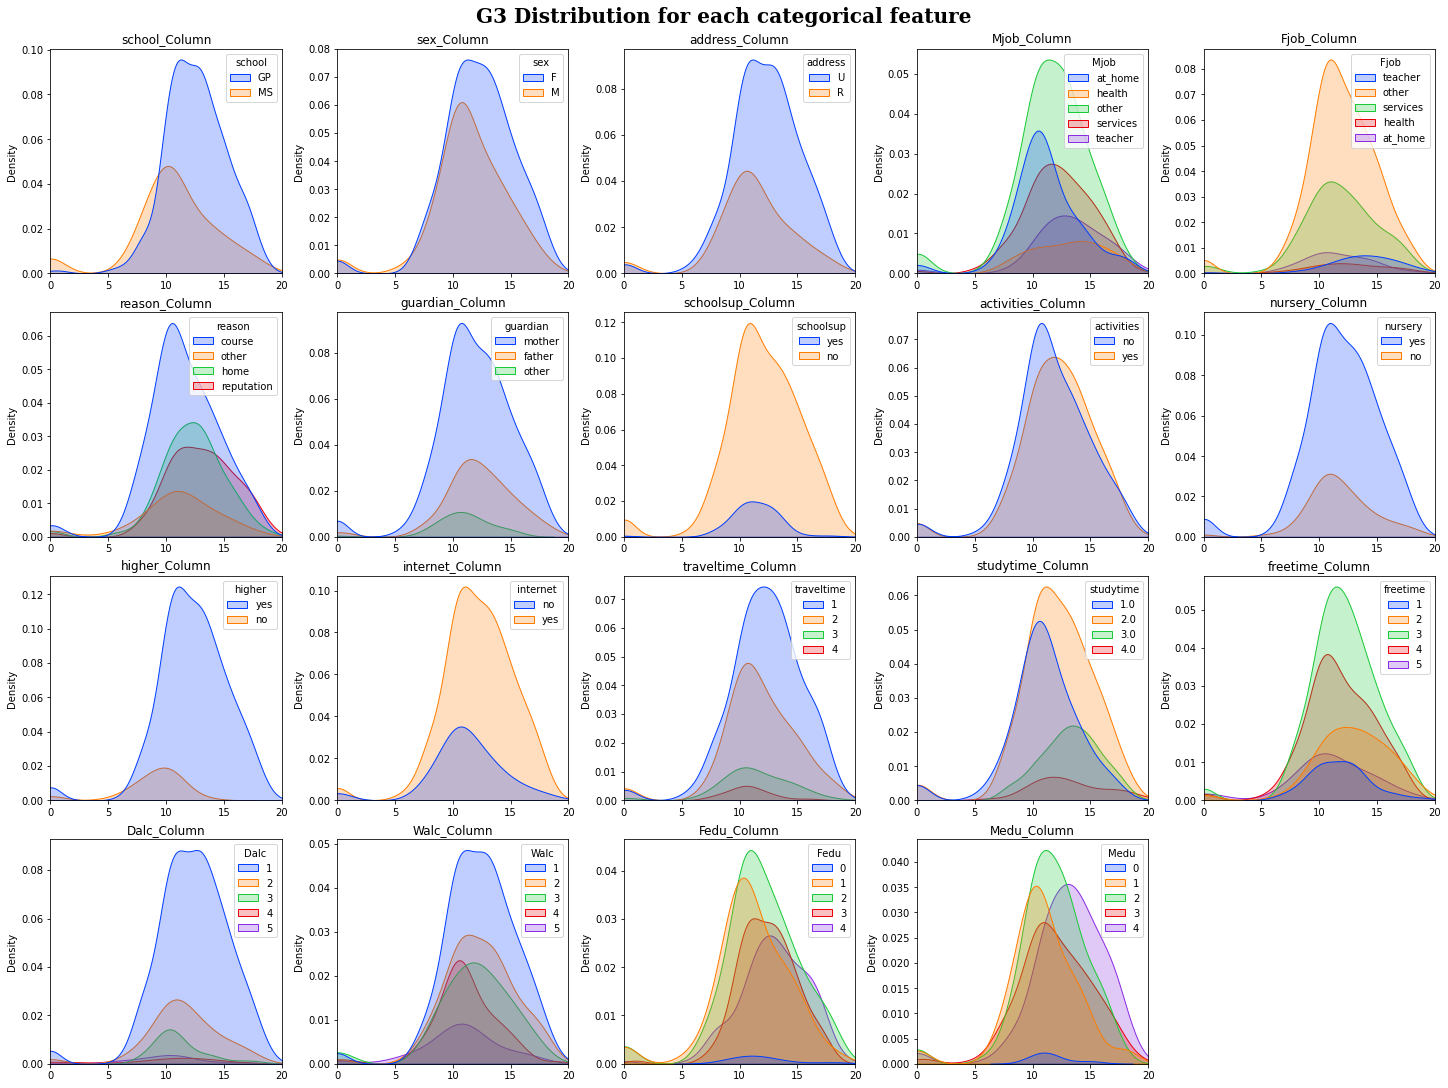

In [14]:
nominal_columns = ['school','sex','address','Mjob','Fjob','reason','guardian',
                   'schoolsup','activities','nursery','higher','internet']
ordinal_columns = ['traveltime','studytime','freetime','Dalc','Walc','Fedu','Medu']

fig,axes = plt.subplots(4,5,figsize=(20,15),constrained_layout=True)
fig.suptitle('G3 Distribution for each categorical feature',size=20, fontweight='bold', fontfamily='serif')
axes=axes.ravel()
axes[-1].remove()#removing non plotted axis

for i in range(len(nominal_columns + ordinal_columns)):
    #Creating plotting data variables
    ax = axes[i]
    col = (nominal_columns + ordinal_columns)[i]
    #plotting function
    sns.kdeplot(x='G3',data=cleandf,hue=col,ax=ax,shade=True,palette='bright').set(xlim=(0,20))
    #Adjusting plot
    ax.set_xlabel("")
    ax.set_title(col+'_Column')

## Continuous Feature

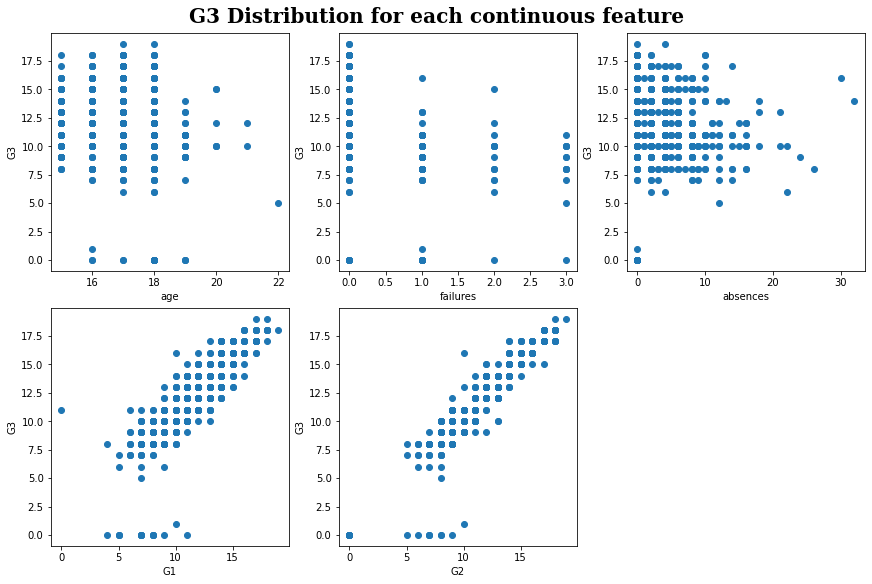

In [15]:
#'age','failures','absences','G1','G2','G3'
import seaborn as sns

fig,axs = plt.subplots(2,3,figsize=(12, 8),constrained_layout=True)
fig.suptitle('G3 Distribution for each continuous feature',size=20, fontweight='bold', fontfamily='serif')

axs[0, 0].scatter(cleandf.age, cleandf.G3)
axs[0, 0].set_xlabel('age')
axs[0, 0].set_ylabel('G3')
axs[0, 1].scatter(cleandf.failures, cleandf.G3)
axs[0, 1].set_xlabel('failures')
axs[0, 1].set_ylabel('G3')
axs[0, 2].scatter(cleandf.absences, cleandf.G3)
axs[0, 2].set_xlabel('absences')
axs[0, 2].set_ylabel('G3')
axs[1, 0].scatter(cleandf.G1, cleandf.G3)
axs[1, 0].set_xlabel('G1')
axs[1, 0].set_ylabel('G3')
axs[1, 1].scatter(cleandf.G2, cleandf.G3)
axs[1, 1].set_xlabel('G2')
axs[1, 1].set_ylabel('G3')
fig.delaxes(axs[1,2])
plt.show()



## Multivariant Relationship
Explore how student manage their time can affect their exam score.

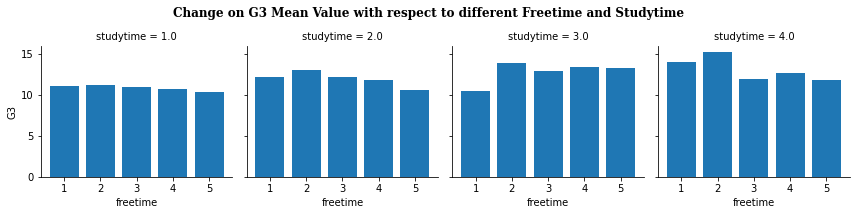

In [16]:
def exam_mean_facetgrid(df,face_column,x_col,mean_col='G3',title=''):
    plot_data = df.groupby([x_col,face_column]).mean()[mean_col].reset_index()
    g=sns.FacetGrid(data=plot_data,col=face_column,margin_titles=True)
    g.map(plt.bar,x_col,mean_col)
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'{title}',size=12, fontweight='bold', fontfamily='serif')

exam_mean_facetgrid(df=cleandf, face_column='studytime', x_col='freetime',title='Change on G3 Mean Value with respect to different Freetime and Studytime')

Obviously more study time will have better result.

We can also spot that student with studytime = 4.0 (> 10 hours) and freetime = 1&2 perform better than those student with freetime = 3&4&5.

This may infere to following posibility:
1. Student study > 10 hours (probably 16 hours) and make him/her has less free time.
2. Student might has activity that can increase their performance. For example, exercise. 

Explore how home address and travel time affect to exam result.

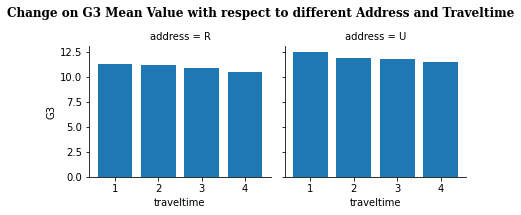

In [17]:
exam_mean_facetgrid(df=cleandf, face_column='address', x_col='traveltime',title='Change on G3 Mean Value with respect to different Address and Traveltime')

We can see when student stay in urban, they take less time to travel and perform better in exam.

This may infere to following posibility:
1. Urban has a more convenient travel system.
2. Shorter travel time, more energetic to learn (no need to wake up so early). 

Explore how home address and internet access affect exam performance.

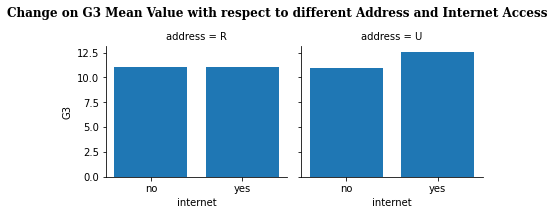

In [18]:
exam_mean_facetgrid(df=cleandf, face_column='address', x_col='internet',title='Change on G3 Mean Value with respect to different Address and Internet Access')

The students in urban more likely to have internet access and perform better in exam.(urban has more advance internet infrastructure-easier get access, easier to gain extra information for study)

From previous finding, female take higher median exam score in result. Explore how different school affect exam score for different sex.

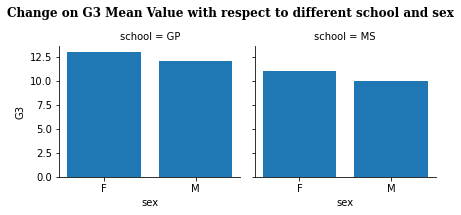

In [19]:
exam_mean_facetgrid(df=cleandf, face_column='school', x_col='sex',title='Change on G3 Mean Value with respect to different school and sex')

We can see female student contribute better result mo matter which school they belong to.

Explore how absences affect student failures and exam score.

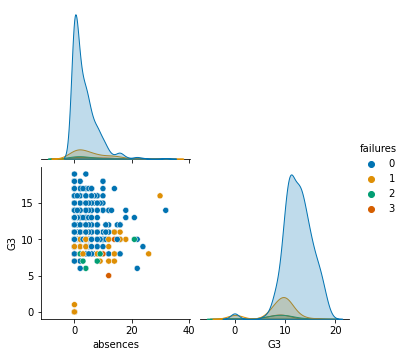

In [20]:
pairplot_df = cleandf[['failures','absences','G3']]
sns.pairplot(pairplot_df, hue='failures', palette='colorblind', corner = True)

From the chart, we can observe that when the absences increase, they are tend to get more failure and lower exam score.

# Data Modelling

## Split into Train and Test Dataset

In [21]:
from sklearn.model_selection import train_test_split as tts
import time

# variables
x = cleandf.drop(['G3'], axis=1)

# target
y = cleandf[['G3']]

# Split training data and test data (70%/30%)
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=40)


## Feature Transformation and Standardization

In [22]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
#encode categorical variable into ordinal
catvar = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason','guardian','schoolsup','activities','nursery','higher','internet']
ordenc = OrdinalEncoder()
x_train[catvar] = ordenc.fit_transform(x_train[catvar])

#standardise x_train data
ss_x = StandardScaler()
x_train = pd.DataFrame(ss_x.fit_transform(x_train))
#x_train = pd.DataFrame(x_train)

#standardise y_train data
ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train)

#encode and standardsise x_test and y_test
x_test[catvar] = ordenc.transform(x_test[catvar])
x_test = pd.DataFrame(ss_x.transform(x_test))
#y_test = ss_y.transform(y_test)

## Model One: Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

start_time = time.time()
#hyper parameter tuning
rfr_param_grid = {'n_estimators':range(50,101)}
rfrReg = GridSearchCV(RandomForestRegressor(random_state = 40), rfr_param_grid, refit=True, verbose=0)
rfrReg.fit(x_train, y_train.ravel())

rfrtime = time.time()-start_time

print(rfrReg.best_estimator_)

RandomForestRegressor(n_estimators=99, random_state=40)


## Model Two: Support Vector Regressor

In [24]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

start_time = time.time()

#hyper parameter tuning
svr_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svrReg = GridSearchCV(svm.SVR(),svr_param_grid, refit=True, verbose=0)
svrReg.fit(x_train,y_train.ravel())

svrtime = time.time()-start_time

print(svrReg.best_estimator_)

SVR(C=100, gamma=0.001, kernel='sigmoid')


## Model Three: K Nearest Neighbors Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

start_time = time.time()

#hyper parameter tuning
knr_param_grid = {'n_neighbors': [3, 5, 7, 13, 15, 17, 19], 'weights': ['uniform','distance']}
knrReg = GridSearchCV(KNeighborsRegressor(),knr_param_grid, refit=True, verbose=0)
knrReg.fit(x_train, y_train.ravel())

knrtime = time.time()-start_time

print(knrReg.best_estimator_)

KNeighborsRegressor(n_neighbors=13, weights='distance')


## Model Four: Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()

DtReg = DecisionTreeRegressor(random_state = 40)
DtReg.fit(x_train, y_train)

dttime = time.time()-start_time

## Model Five: Ridge Regressor

In [27]:
from sklearn.linear_model import Ridge

start_time = time.time()

rr_param_grid = {'alpha':[0,0.2,0.4,0.6,0.8,1,10,100]}
ridgeReg = GridSearchCV(Ridge(), rr_param_grid, refit=True, verbose=0)
ridgeReg.fit(x_train, y_train)

ridgetime = time.time()-start_time

print(ridgeReg.best_estimator_)

Ridge(alpha=1)


# Results Evalutaion

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def modelacc(modelname, model, x_test, y_test, ss_y):
  model_y_pred = model.predict(x_test)
  model_y_pred = ss_y.inverse_transform(model_y_pred.reshape(-1,1))

  modelr2 = r2_score(y_test, model_y_pred)
  modelmse = mean_squared_error(y_test, model_y_pred)
  modelmae = mean_absolute_error(y_test, model_y_pred)

  reseval = pd.DataFrame({
      'Model': [modelname],
      'R2_score': [modelr2],
      'MSE': [modelmse],
      'MAE': [modelmae]
  })

  return(reseval)

######
result = pd.DataFrame(columns= ["Model", "R2_score", "MSE", "MAE"])

#model one: rfr
rfrRegacc = modelacc('RFR', rfrReg, x_test, y_test, ss_y)
result = result.append(rfrRegacc, ignore_index = True)

#model two: svr
svrRegacc = modelacc('SVR', svrReg, x_test, y_test, ss_y)
result = result.append(svrRegacc, ignore_index = True)

#model three: KNR
neighacc = modelacc('KNR', knrReg, x_test, y_test, ss_y)
result = result.append(neighacc, ignore_index = True)

#model four: DT
DtRegacc = modelacc('DT', DtReg, x_test, y_test, ss_y)
result = result.append(DtRegacc, ignore_index = True)

#model five: 
ridgeRegacc = modelacc('Ridge', ridgeReg, x_test, y_test, ss_y)
result = result.append(ridgeRegacc, ignore_index = True)

result['Time(s)'] = [rfrtime, svrtime, knrtime, dttime, ridgetime]
print(result)


   Model  R2_score       MSE       MAE    Time(s)
0    RFR  0.836988  1.967419  0.841388  49.452292
1    SVR  0.813252  2.253889  0.866753   4.880419
2    KNR  0.590293  4.944823  1.478549   0.380763
3     DT  0.620988  4.574359  1.117949   0.004986
4  Ridge  0.821261  2.157229  0.868879   0.181489


We see that random forest regressor (RFR) gives the best r2 score, but with a significantly longer time taken (especially when doing hyperparameter tuning). Ridge regressor comes close as second with a much shorter execution time. On the other hand, both k-nearest neighbour and decision tree regressor perform poorly on this set of data.

# Summary

In summary, from 33 variables we have dropped 8 of it which are family size (famsize), parent's cohabitation status (Pstatus), family educational support (famsup), extra paid classes within the course subject (paid), with a romantic relationship (romantic), quality of family relationships (famrel), going out with friends (goout) and current health status (health) due to irrelavent score to the student grade. The criteria for dropping the variables is based on boxplot, scatterplot, pearson correlation coefficient and chi-square test. From exploratory data analysis, we can conclude that study and travel time taken, student's home area, their absences to the class and gender variable can influence individual student performance in Portugal language study which reflecting our first research question. <br>

Meanwhile, in answering the second research question, five machine learning-based regressor namely Random Forest Regressor, Support Vector Regressor, K Nearest Neighbors Regression Model, Decision Tree Regressor and Ridge Regressor were implemented to predict student’s performance. As a result, Random Forest Regressor is the best model in predicting the student's performance with accuracy of R2 score = 0.836988. Followed by ridge regressor, R2 score = 0.821261 and Support Vector Regressor, R2 score = 0.813252.

